In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from model import load_data, preprocess_data

In [2]:
# Load the model and data
model = tf.keras.models.load_model('diabetes_model.h5')
diabetes_df = load_data()
X_resampled, y_resampled, X_test, y_test = preprocess_data(diabetes_df)

c:\Users\josht\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Combine resampled and test data
X_combined = np.vstack((X_resampled, X_test))
y_combined = np.hstack((y_resampled, y_test))

In [4]:
# Get feature names (replace with actual feature names if available)
feature_names = [f'feature_{i}' for i in range(X_combined.shape[1])]

In [ ]:
# SHAP analysis
def shap_analysis(model, X):
    # Create a wrapper function for the model
    def model_wrapper(x):
        return model.predict(x).flatten()

    # Create the explainer
    explainer = shap.KernelExplainer(model_wrapper, X[:100])  # Use a subset of data for background
    
    # Compute SHAP values
    shap_values = explainer.shap_values(X[:1000])  # Explain first 1000 predictions
    
    # Ensure feature_names is a list
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
    # Create summary plot
    shap.summary_plot(shap_values, X[:1000], feature_names=feature_names, show=False)
    plt.title("SHAP Summary Plot")
    plt.tight_layout()
    plt.show()

    # Create dependence plot
    shap.dependence_plot(0, shap_values, X[:1000], feature_names=feature_names, show=False)
    plt.title("SHAP Dependence Plot")
    plt.tight_layout()
    plt.show()


In [6]:
# LIME analysis
def lime_analysis(model, X):
    # Get feature names (replace with actual feature names if available)
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X,
        feature_names=feature_names,
        class_names=['No Diabetes', 'Diabetes'],
        mode='regression'  # Change this to regression mode
    )
    
    def predict_fn(x):
        predictions = model.predict(x)
        print("Shape of predictions:", predictions.shape)
        print("Predictions:", predictions)
        # Ensure the output is 2D with probabilities for both classes
        if predictions.ndim == 1 or predictions.shape[1] == 1:
            return np.column_stack((1 - predictions, predictions))
        return predictions
    
    # Explain a single prediction
    exp = explainer.explain_instance(X[0], predict_fn, num_features=len(feature_names))
    
    # Display the explanation
    exp.show_in_notebook(show_table=True)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 364us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 363us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 354us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 354us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step
1/1 

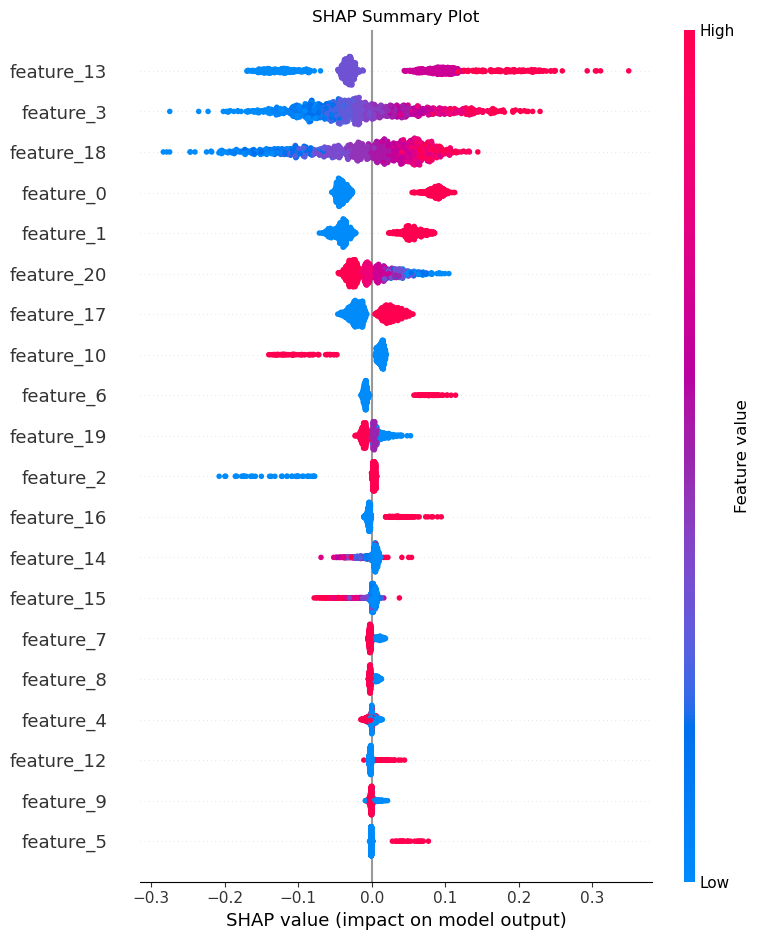

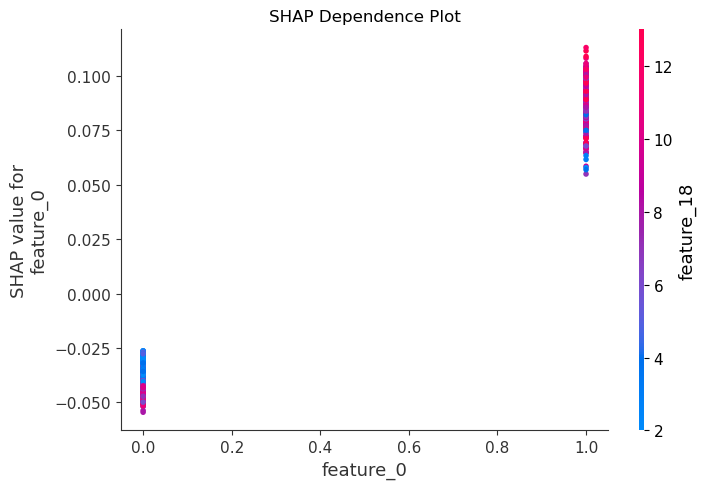

In [7]:
# Run SHAP analysis
shap_analysis(model, X_combined)

In [8]:
# Run LIME analysis
lime_analysis(model, X_combined)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
Shape of predictions: (5000, 1)
Predictions: [[0.8178123 ]
 [0.5111349 ]
 [0.6812656 ]
 ...
 [0.47988614]
 [0.6984397 ]
 [0.557726  ]]
